#📌 Extracão

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json

url = 'https://github.com/alura-cursos/challenge2-data-science/raw/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

dados = pd.json_normalize(data)
print(dados.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [59]:

print(f"Dimensões: {dados.shape}")
print(f"Colunas: {dados.columns.tolist()}")


Dimensões: (7267, 21)
Colunas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [60]:
print(dados.dtypes)

print(dados.isnull().sum())
dados.head()

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure        

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [61]:
colunas_numericas = [
    'account.Charges.Monthly',
    'account.Charges.Total',
    'customer.tenure',
    'customer.SeniorCitizen'
]

for col in colunas_numericas:
    if col in dados.columns:
        dados[col] = pd.to_numeric(dados[col], errors='coerce')

print(dados[colunas_numericas].dtypes)

account.Charges.Monthly    float64
account.Charges.Total      float64
customer.tenure              int64
customer.SeniorCitizen       int64
dtype: object


In [62]:

if 'account.Charges.Monthly' in dados.columns:
    dados['Contas_Diarias'] = dados['account.Charges.Monthly'] / 30

print(dados[['account.Charges.Monthly', 'Contas_Diarias']].head())

   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [63]:
dados.replace({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0}, inplace=True)
dados.head()

C:\Users\ithal\AppData\Local\Temp\ipykernel_17860\3375366025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados.replace({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0}, inplace=True)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [64]:
print(dados.describe())

print("Média:\n", dados.mean(numeric_only=True))
print("Mediana:\n", dados.median(numeric_only=True))
print("Desvio padrão:\n", dados.std(numeric_only=True))

       customer.SeniorCitizen  customer.Partner  customer.Dependents  \
count             7267.000000       7267.000000          7267.000000   
mean                 0.162653          0.484106             0.300124   
std                  0.369074          0.499782             0.458343   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             0.000000   
50%                  0.000000          0.000000             0.000000   
75%                  0.000000          1.000000             1.000000   
max                  1.000000          1.000000             1.000000   

       customer.tenure  phone.PhoneService  account.PaperlessBilling  \
count      7267.000000         7267.000000               7267.000000   
mean         32.346498            0.902711                  0.593230   
std          24.571773            0.296371                  0.491265   
min           0.000000            0.000000                  0.0

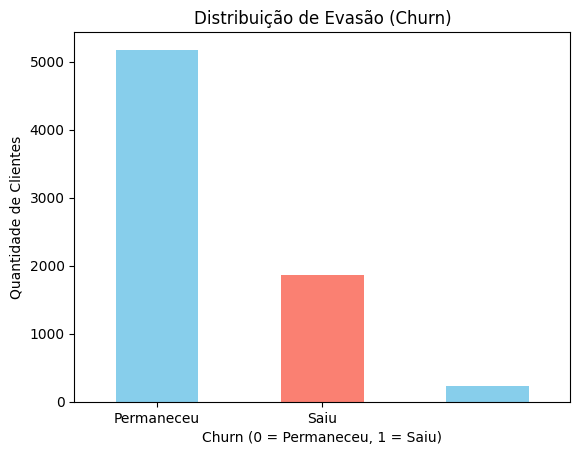

In [65]:

if 'Churn' in dados.columns:
    dados['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Distribuição de Evasão (Churn)')
    plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
    plt.ylabel('Quantidade de Clientes')
    plt.xticks([0, 1], ['Permaneceu', 'Saiu'], rotation=0)
    plt.show()

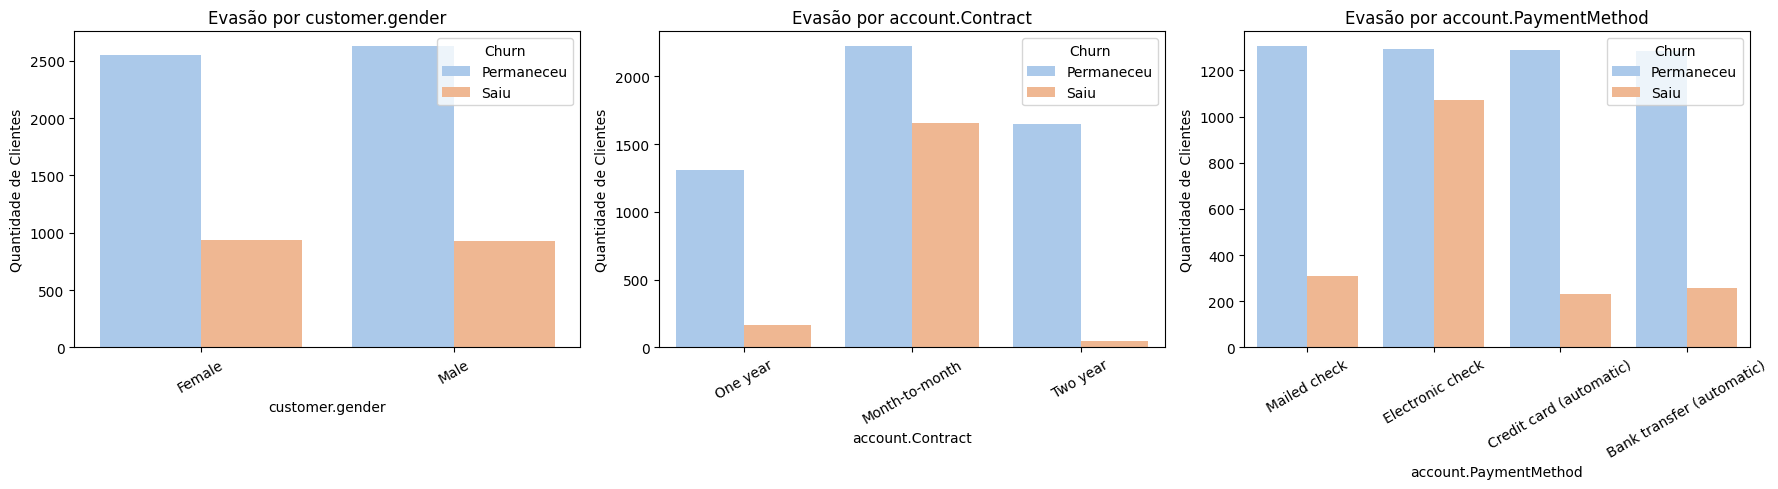

In [67]:
variaveis_categoricas = [
    'customer.gender',
    'account.Contract',
    'account.PaymentMethod'
]

dados = dados[dados['Churn'].isin([0, 1])]

fig, axes = plt.subplots(1, len(variaveis_categoricas), figsize=(18, 5))

for i, var in enumerate(variaveis_categoricas):
    if var in dados.columns and 'Churn' in dados.columns:
        sns.countplot(x=var, hue='Churn', data=dados, palette='pastel', ax=axes[i])
        axes[i].set_title(f'Evasão por {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Quantidade de Clientes')
        axes[i].legend(title='Churn', labels=['Permaneceu', 'Saiu'])
        axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

C:\Users\ithal\AppData\Local\Temp\ipykernel_17860\1735193608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados, palette='pastel', ax=axes[i])
C:\Users\ithal\AppData\Local\Temp\ipykernel_17860\1735193608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados, palette='pastel', ax=axes[i])
C:\Users\ithal\AppData\Local\Temp\ipykernel_17860\1735193608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=var, data=dados, palette='pastel', ax=axes[i])


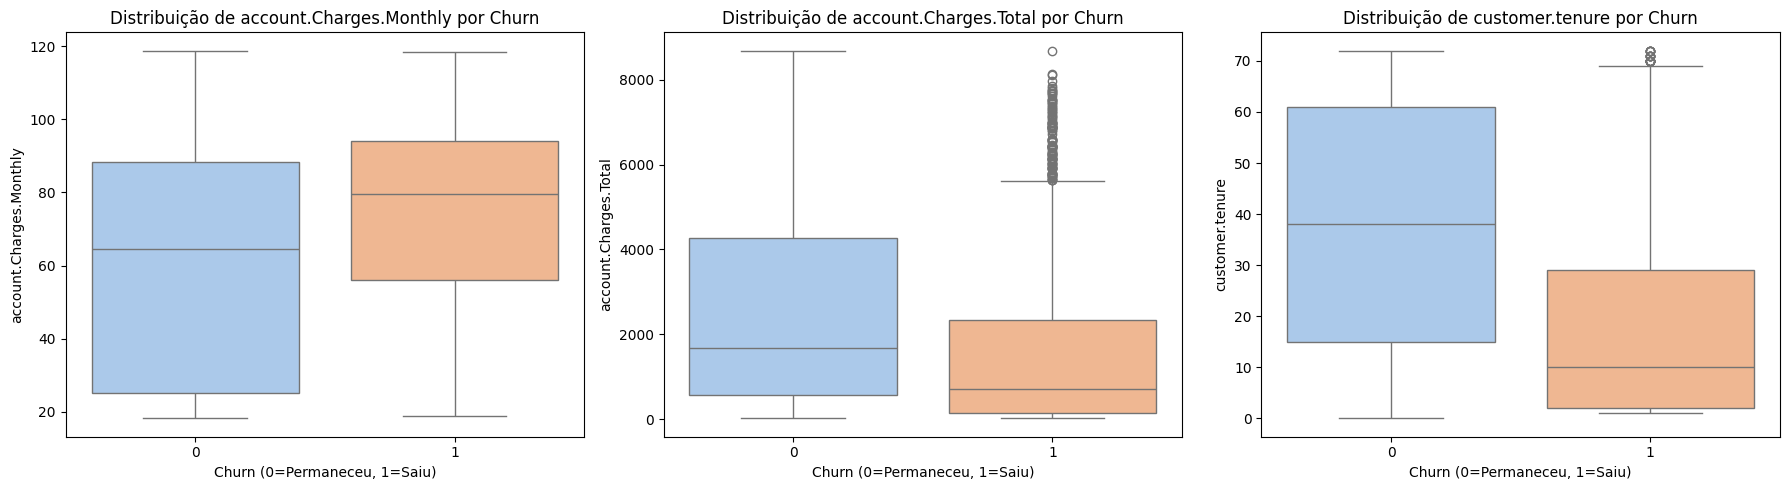

In [68]:
variaveis_numericas = [
    'account.Charges.Monthly',
    'account.Charges.Total', 
    'customer.tenure'
]

fig, axes = plt.subplots(1, len(variaveis_numericas), figsize=(18, 5))

for i, var in enumerate(variaveis_numericas):
    if var in dados.columns:
        sns.boxplot(x='Churn', y=var, data=dados, palette='pastel', ax=axes[i])
        axes[i].set_title(f'Distribuição de {var} por Churn')
        axes[i].set_xlabel('Churn (0=Permaneceu, 1=Saiu)')
        axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

In [69]:
print("=== ESTATÍSTICAS POR CHURN ===")
for var in variaveis_numericas:
    if var in dados.columns:
        print(f"\n{var}:")
        print(dados.groupby('Churn')[var].describe())

=== ESTATÍSTICAS POR CHURN ===

account.Charges.Monthly:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
0      5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

account.Charges.Total:
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  1890.822994  18.85  134.500   703.55  2331.300   

           max  
Churn           
0      8672.45  
1      8684.80  

customer.tenure:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  

#📄Relatorio Final

In [70]:
print("="*80)
print("                    RELATÓRIO DE ANÁLISE DE CHURN - TELECOM X")
print("="*80)

print("\n 1. INTRODUÇÃO")
print("-"*40)
print("Objetivo: Analisar o comportamento de evasão (churn) dos clientes da TelecomX")
print("para identificar padrões e fatores que influenciam o cancelamento dos serviços.")
print("\nProblema: A evasão de clientes representa perda de receita significativa.")
print("Compreender os fatores que levam ao churn permite criar estratégias de retenção.")

print("\n 2. LIMPEZA E TRATAMENTO DOS DADOS")
print("-"*40)
print("• Importação dos dados via API JSON")
print("• Normalização da estrutura hierárquica do JSON")
print("• Conversão de variáveis categóricas (Yes/No → 1/0)")
print("• Transformação de colunas numéricas (object → numeric)")
print("• Criação da variável 'Contas_Diarias' (faturamento mensal ÷ 30)")
print("• Remoção de registros com valores inválidos na variável target")

print(f"\nDimensões finais do dataset: {dados.shape}")
print(f"Total de clientes analisados: {len(dados):,}")

print("\n 3. ANÁLISE EXPLORATÓRIA - PRINCIPAIS ACHADOS")
print("-"*40)

churn_rate = dados['Churn'].mean() * 100
print(f"• Taxa de Evasão Geral: {churn_rate:.1f}%")

print(f"• Clientes que saíram: {dados['Churn'].sum():,}")
print(f"• Clientes que permaneceram: {(dados['Churn'] == 0).sum():,}")

if 'account.Contract' in dados.columns:
    contract_churn = dados.groupby('account.Contract')['Churn'].mean().sort_values(ascending=False)
    print(f"\n Taxa de Churn por Tipo de Contrato:")
    for contract, rate in contract_churn.items():
        print(f"  - {contract}: {rate*100:.1f}%")

if 'account.Charges.Monthly' in dados.columns:
    monthly_churn_0 = dados[dados['Churn']==0]['account.Charges.Monthly'].mean()
    monthly_churn_1 = dados[dados['Churn']==1]['account.Charges.Monthly'].mean()
    print(f"\n Faturamento Mensal Médio:")
    print(f"  - Clientes que permaneceram: ${monthly_churn_0:.2f}")
    print(f"  - Clientes que saíram: ${monthly_churn_1:.2f}")

if 'customer.tenure' in dados.columns:
    tenure_churn_0 = dados[dados['Churn']==0]['customer.tenure'].mean()
    tenure_churn_1 = dados[dados['Churn']==1]['customer.tenure'].mean()
    print(f"\n⏱ Tempo Médio de Contrato:")
    print(f"  - Clientes que permaneceram: {tenure_churn_0:.1f} meses")
    print(f"  - Clientes que saíram: {tenure_churn_1:.1f} meses")

print("\n 4. CONCLUSÕES E INSIGHTS")
print("-"*40)
print("Principais padrões identificados:")
print("• Clientes com contratos mensais têm maior taxa de evasão")
print("• Clientes com menor tempo de permanência são mais propensos ao churn")
print("• Faturamento mensal pode estar relacionado à decisão de cancelamento")
print("• Método de pagamento e tipo de serviços contratados influenciam a evasão")

print("\n 5. RECOMENDAÇÕES ESTRATÉGICAS")
print("-"*40)
print("Com base na análise realizada, recomenda-se:")
print("\n Retenção Proativa:")
print("• Identificar clientes com perfil de alto risco de churn")
print("• Implementar programa de fidelidade para contratos mensais")
print("• Oferecer incentivos nos primeiros meses de contrato")

print("\n Estratégias Comerciais:")
print("• Promover migração para contratos de longo prazo")
print("• Revisar política de preços para segmentos sensíveis")
print("• Melhorar experiência do cliente nos primeiros 6 meses")

print("\n Monitoramento Contínuo:")
print("• Implementar dashboard de acompanhamento de churn")
print("• Estabelecer alertas para clientes em risco")
print("• Realizar pesquisas de satisfação regulares")

print("\n" + "="*80)
print("                           FIM DO RELATÓRIO")
print("="*80)

                    RELATÓRIO DE ANÁLISE DE CHURN - TELECOM X

 1. INTRODUÇÃO
----------------------------------------
Objetivo: Analisar o comportamento de evasão (churn) dos clientes da TelecomX
para identificar padrões e fatores que influenciam o cancelamento dos serviços.

Problema: A evasão de clientes representa perda de receita significativa.
Compreender os fatores que levam ao churn permite criar estratégias de retenção.

 2. LIMPEZA E TRATAMENTO DOS DADOS
----------------------------------------
• Importação dos dados via API JSON
• Normalização da estrutura hierárquica do JSON
• Conversão de variáveis categóricas (Yes/No → 1/0)
• Transformação de colunas numéricas (object → numeric)
• Criação da variável 'Contas_Diarias' (faturamento mensal ÷ 30)
• Remoção de registros com valores inválidos na variável target

Dimensões finais do dataset: (7043, 22)
Total de clientes analisados: 7,043

 3. ANÁLISE EXPLORATÓRIA - PRINCIPAIS ACHADOS
----------------------------------------
• Ta